# 2018/2019 - Task List 2

1. Visualize (pmf, mean, variance) of pseudo random number generators (parametrized) that follows distributions:

    - Single gaussian 
    - Two combined gaussian distributions 
    - N combined gaussian distributions 


2. Student applied for 9 faculties, acceptance chance for each faculty was 0.01. Unfortunately student was not accepted to any. What is the probability of that situation? Write a function that will solve that problem (parametrized), use exact method and binomials based solution with parameterized number of trials (binomial)

## Required imports

In [1]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# Binomial sampling

In [165]:
m = pyro.distributions.Binomial(1, torch.Tensor(9*[0.01]))
m.sample()

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]


In [33]:
m = pyro.distributions.Binomial(1, torch.Tensor(5*[0.5]))
m.sample()

tensor([1., 1., 1., 0., 1.])

In [42]:
m = pyro.distributions.Binomial(1, torch.Tensor(5*[0.5]))
m.log_prob(torch.Tensor([1]))

tensor([-0.6931, -0.6931, -0.6931, -0.6931, -0.6931])

## Task 1

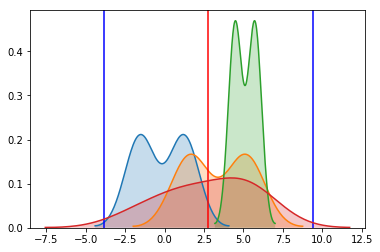

In [250]:
import seaborn as sns
import math

def showNormalSamples(sampleSize, mean, var):
    y = []
    for i in range(len(mean)):
        x = np.random.normal(mean[i], var[i], sampleSize)
        for z in range(len(x)):
            y.append(x[z])
        
        sns.kdeplot(x, shade=True)

    plt.axvline(np.mean(y), color = 'red')
    plt.axvline(np.mean(y) + np.var(y), color = 'blue')
    plt.axvline(np.mean(y) - np.var(y), color = 'blue')
    sns.kdeplot(y, shade=True)
    
showNormalSamples(2, [1,3,5], [1,1,1])


## Task 2

In [265]:
# def draw(repeatNum, main_values, real_values):
#     values = [i for i in range(0, repeatNum)]
#     fig, ax = plt.subplots()
#     line, = ax.plot(values, main_values, lw=2)
#     line2, = ax.plot(values, real_values, lw=2)
#     plt.ylabel('Probability')
#     plt.xlabel('Number of tries')

def silnia(x):
    return x * silnia(x-1) if x != 0 else 1

def getProb(triesNum, failsNum, acceptanceChance):
    return (silnia(triesNum)/(silnia(failsNum)*silnia(triesNum-failsNum)))*pow(acceptanceChance, failsNum)*pow((1-acceptanceChance),triesNum-failsNum)

def studentsSolution(triesNum = 9, failsNum = 9, acceptanceChance = 0.99, repeatNum = 100):
    
    mainProb = getProb(triesNum, failsNum, acceptanceChance)
    print(mainProb)
    
    for _ in range(repeatNum):
        count = 0
        m = pyro.distributions.Binomial(1, torch.Tensor(triesNum*[acceptanceChance]))
        for i in range(triesNum):
            if m.sample()[i] == 1.0 :
                count += 1
                continue
    
    print(1-count/repeatNum)
    
#     draw(repeatNum, main_values, real_values)
    
studentsSolution()

0.9135172474836408
0.92


# Task 3

In [ ]:
## Insert solution here